In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd 



In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [15]:
df = pd.read_html(url, index_col=0)[0]
#df=pd.read_html(url)[0]
df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
month_mars = df['month'].max()
month_mars

12

In [21]:
print(f'There are {month_mars} months on Mars.')

There are 12 months on Mars.


In [22]:
start_date = df['sol'].min()
end_date = df['sol'].max()

In [23]:
duration = end_date - start_date
duration

1967

In [24]:
print(f'There are {duration} Martian days worth of data existing in the scraped dataset.' )

There are 1967 Martian days worth of data existing in the scraped dataset.


In [25]:
avg_temp_monthly = df.groupby(['month'])['min_temp'].mean()
avg_temp_monthly

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

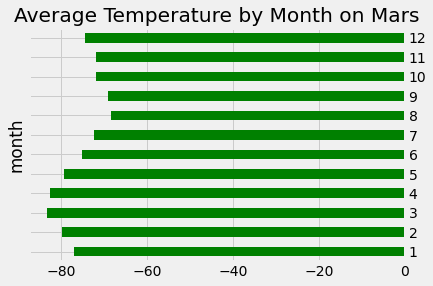

In [60]:
plt1= avg_temp_monthly.plot.barh(title ='Average Temperature by Month on Mars', ylabel = 'average temperature(Celsius)', color="green")

plt1.tick_params(axis='y', which='both', labelleft=False, labelright=True)





In [27]:
avg_pressure_df =df.groupby(['month'])['pressure'].mean()
avg_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:title={'center':'Atmospheric Pressure Analysis on Mars'}, xlabel='month', ylabel='Average Pressure'>

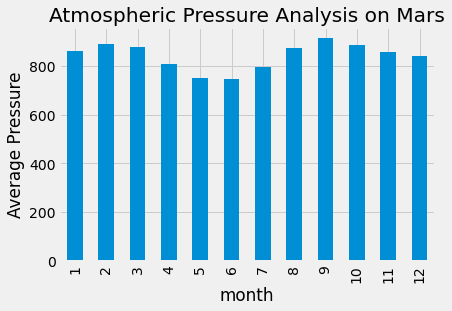

In [62]:
avg_pressure_df.plot(kind= 'bar', ylabel='Average Pressure', title='Atmospheric Pressure Analysis on Mars')

